In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [ ]:
# load dataset
telco_churn = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
# show dataset from top 5 rows
telco_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# info data for each column 
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# info row and column 
telco_churn.shape

(7043, 21)

observation: 
1. data has various features and contains with 21 column - 7043 rows
2. further detail for features will be identified later
3. no missing value is detected however, will be found with basic cleansing to these following below


# Standard data cleansing

`Total Charge` is detected as float instead of numeric, this is because the column is contained with white space

In [ ]:
# Check data set and exclude the white space in column Total Charge
telco_churn.loc[~telco_churn['TotalCharges'].str.contains(' ')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
# convert total charges to numerical value so white space will be detected and replaced with Nan
telco_churn['TotalCharges'] = telco_churn.TotalCharges.replace(' ', np.nan).astype(float)
telco_churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# percentage version for missing values
telco_churn.isna().sum() * 100 / len(telco_churn)

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

In [ ]:
# since nan is less than 5% we can just drop these missing value 
telco_churn.dropna(axis=0, inplace=True)
telco_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# check duplicated row after drop a column
telco_churn.duplicated().sum()

0

observation: 
1. total rows after exclude white space in column `Total Charge` is decreased
2. data is cleaned with converting `Total Charge` to numeric, replace white space with Nan so can be detected as missing malue and drop them
3. data now is nicely cleaned with new total rows 7032 and 21 coloumns

# Statictical summary

In [ ]:
# group column based from numerical features
numericals = telco_churn.select_dtypes(include=np.number).columns.tolist()
numericals

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
# see statisctical summary for numerical features
telco_churn[numericals].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


observation:
1. `Senior Citizen` is contained with boolean/biner 0/1 
2. median for `tenure` and `Monthly Charge` indicating showed somewhat skewed
3. median for `Total Charge` indicating showed positively skewed

In [ ]:
# group column based from categorical features
categoricals = telco_churn.select_dtypes(include=object).columns.tolist()
telco_churn[categoricals].describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [ ]:
# showing the precise value counts and check statisctical summary for categorical features
for col in categoricals:
  print(f"Value counts of {col} column")
  print(telco_churn[col].value_counts(), '\n')

Value counts of customerID column
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: customerID, Length: 7032, dtype: int64 

Value counts of gender column
Male      3549
Female    3483
Name: gender, dtype: int64 

Value counts of Partner column
No     3639
Yes    3393
Name: Partner, dtype: int64 

Value counts of Dependents column
No     4933
Yes    2099
Name: Dependents, dtype: int64 

Value counts of PhoneService column
Yes    6352
No      680
Name: PhoneService, dtype: int64 

Value counts of MultipleLines column
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

Value counts of InternetService column
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

Value counts of OnlineSecurity column
No                     3497
Yes                    2015
No i

In [ ]:
# filter categorical features and one numerical features 
demograph_ctg = ['gender','SeniorCitizen','Partner','Dependents']
service_ctg = ['PhoneService','MultipleLines','InternetService','StreamingMovies','StreamingTV']
support_ctg = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport']
user_info = ['Contract','PaperlessBilling','PaymentMethod','Churn']

observation: 
1. due to categorical features contains many columns therefore will be filtered 
together with `Senior Citizen` which although numeric they actually have categorical features with boolean values
2. `customerID` is excluded
3. fiters function to easily understand chart and their correlations with multiple categories in bivariate and multivariate analysis



# Univariate analysis

## Boxplot to detect outliers

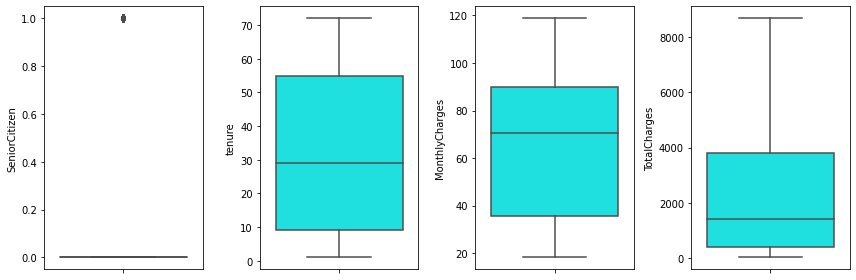

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,4))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=telco_churn[features[i]], color='cyan')
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

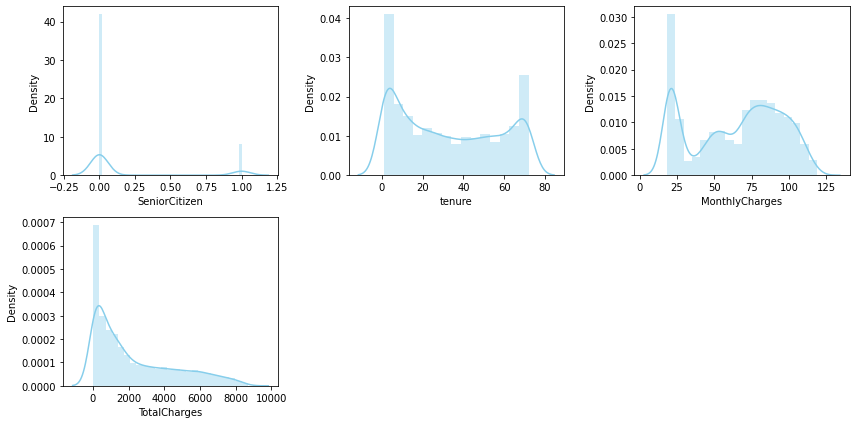

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=telco_churn[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

observation: 
1. based from boxplot no outlier detected for numerical features (except `Senior Citizen` who has boolean values)
2. `tenure` is showing bimodal distribution with mean > median so identified as positively skewed
3. `Monthly Charges` is showing multinom distributions with mean < median so identified as negatively skewed
4. `Total Charges` is showing positively skewed

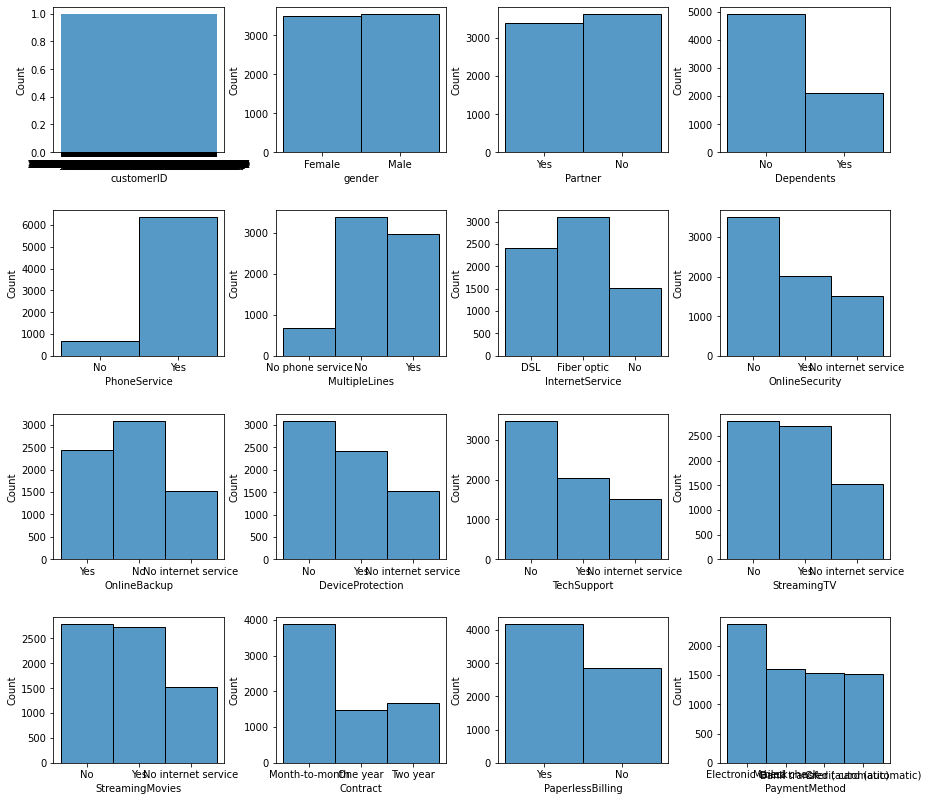

In [ ]:
# univariate for all categorical features
fig, ax = plt.subplots(4, 4, figsize=(15, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=1, wspace=0.3, hspace=0.4)
for variable, subplot in zip(telco_churn.select_dtypes(exclude=np.number).columns, ax.flatten()):
  sns.histplot(telco_churn[variable], ax=subplot)


observation:
Based from histogram above there are imbalance data between each values except for `gender` and `Partner`

# Bivariate analysis

### Bivariate analysis using categorical features with curn as predictor




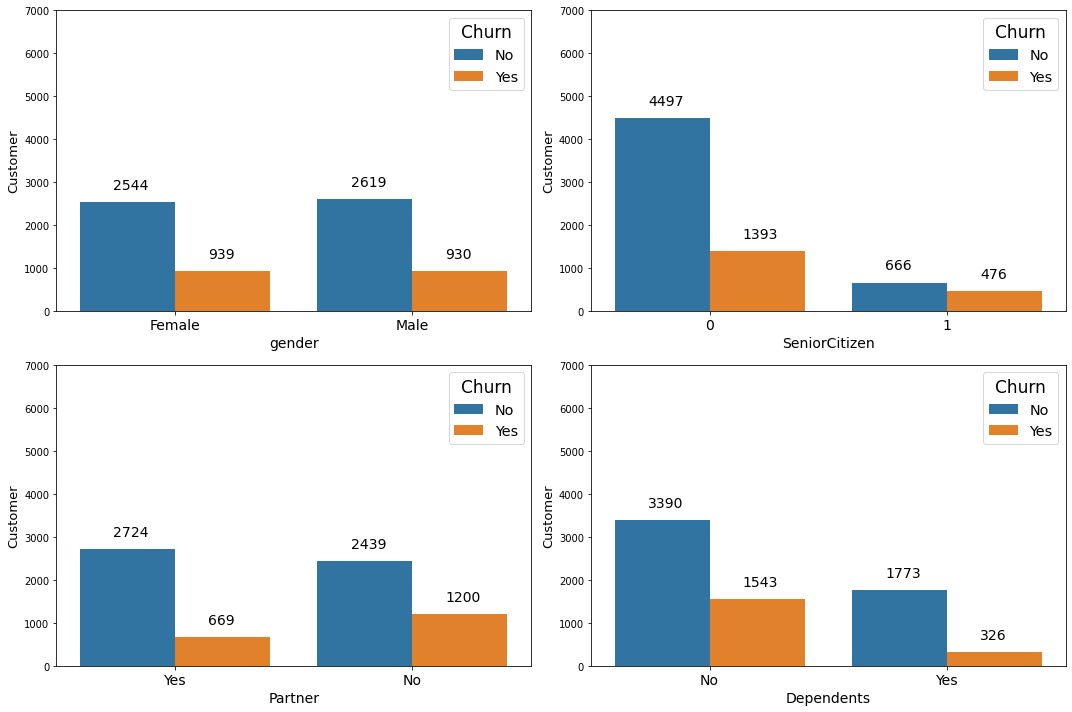

In [ ]:
# categorical - categorical bivariate analysis for demographic category
plt.figure(figsize=(15,10))
for i, col in enumerate(demograph_ctg):
  plt.subplot(2,2,i+1)
  ax = sns.countplot(data=telco_churn, x=col, hue='Churn')

  plt.xlabel(col, fontsize=14)
  plt.ylabel('Customer',fontsize=13)
  plt.ylim(0,7000)
  plt.xticks(fontsize=14)
  plt.legend(title='Churn',fontsize='x-large',title_fontsize='17')
  for p in ax.patches:
      ax.annotate((p.get_height()),(p.get_x()+0.14, p.get_height()+300), fontsize=14)
plt.tight_layout()
plt.show()

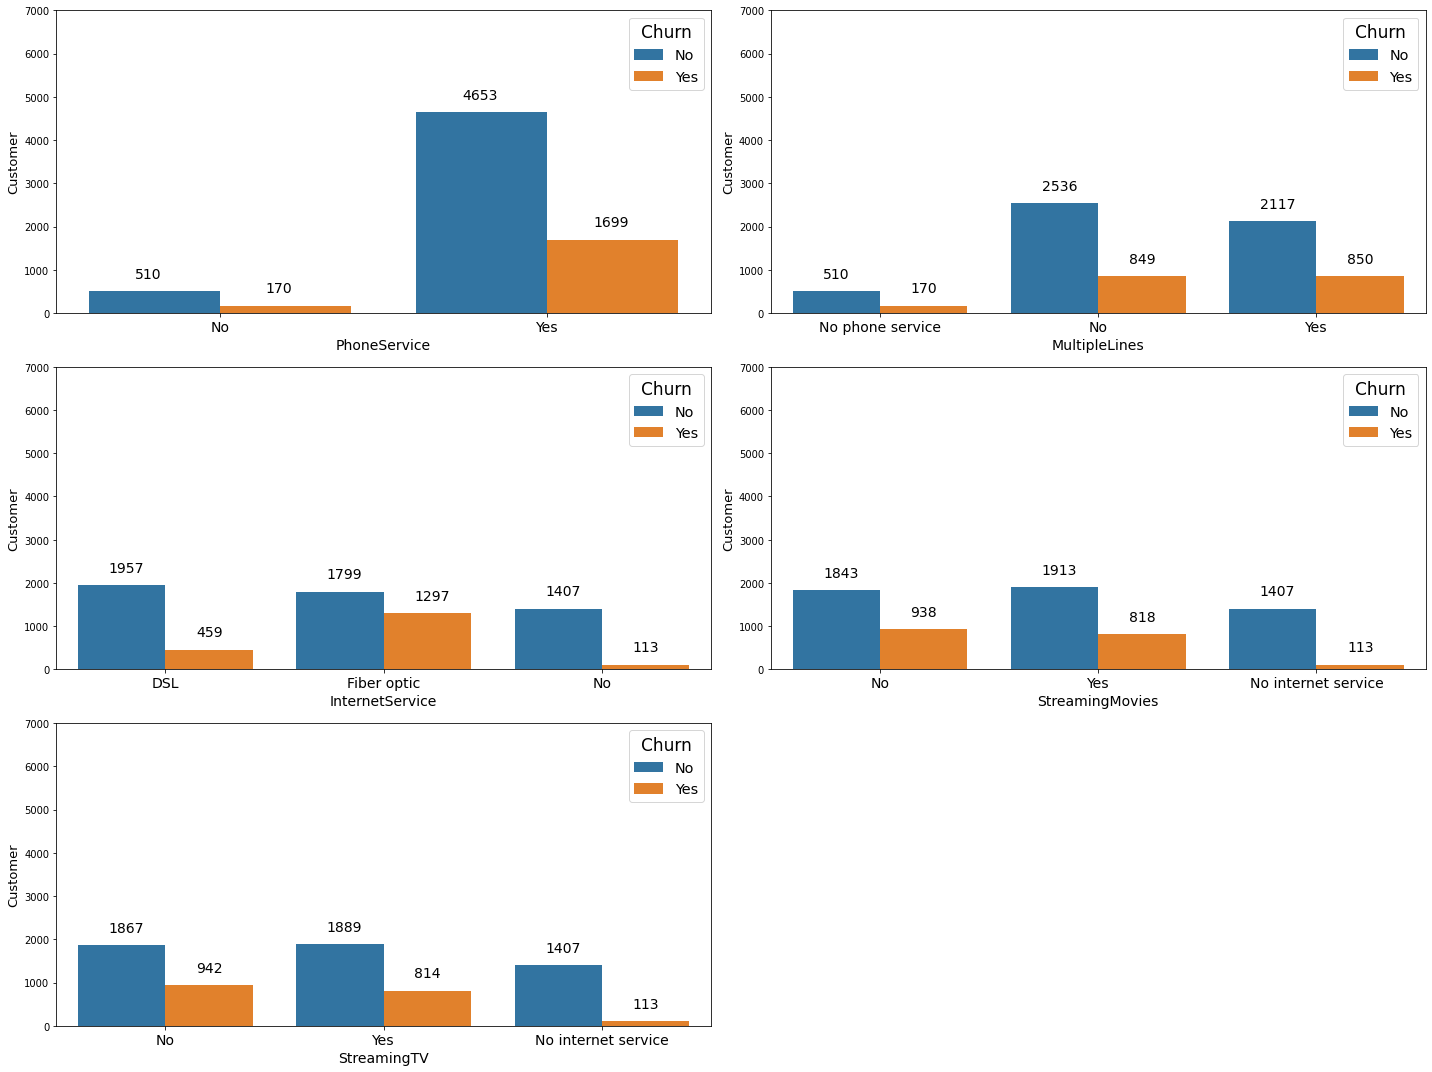

In [ ]:
# categorical - categorical bivariate analysis for service category
plt.figure(figsize=(20,15))
for i, col in enumerate(service_ctg):
  plt.subplot(3,2,i+1)
  ax = sns.countplot(data=telco_churn, x=col, hue='Churn')

  plt.xlabel(col, fontsize=14)
  plt.ylabel('Customer',fontsize=13)
  plt.ylim(0,7000)
  plt.xticks(fontsize=14)
  plt.legend(title='Churn',fontsize='x-large',title_fontsize='17')
  for p in ax.patches:
      ax.annotate((p.get_height()),(p.get_x()+0.14, p.get_height()+300), fontsize=14)
plt.tight_layout()
plt.show()

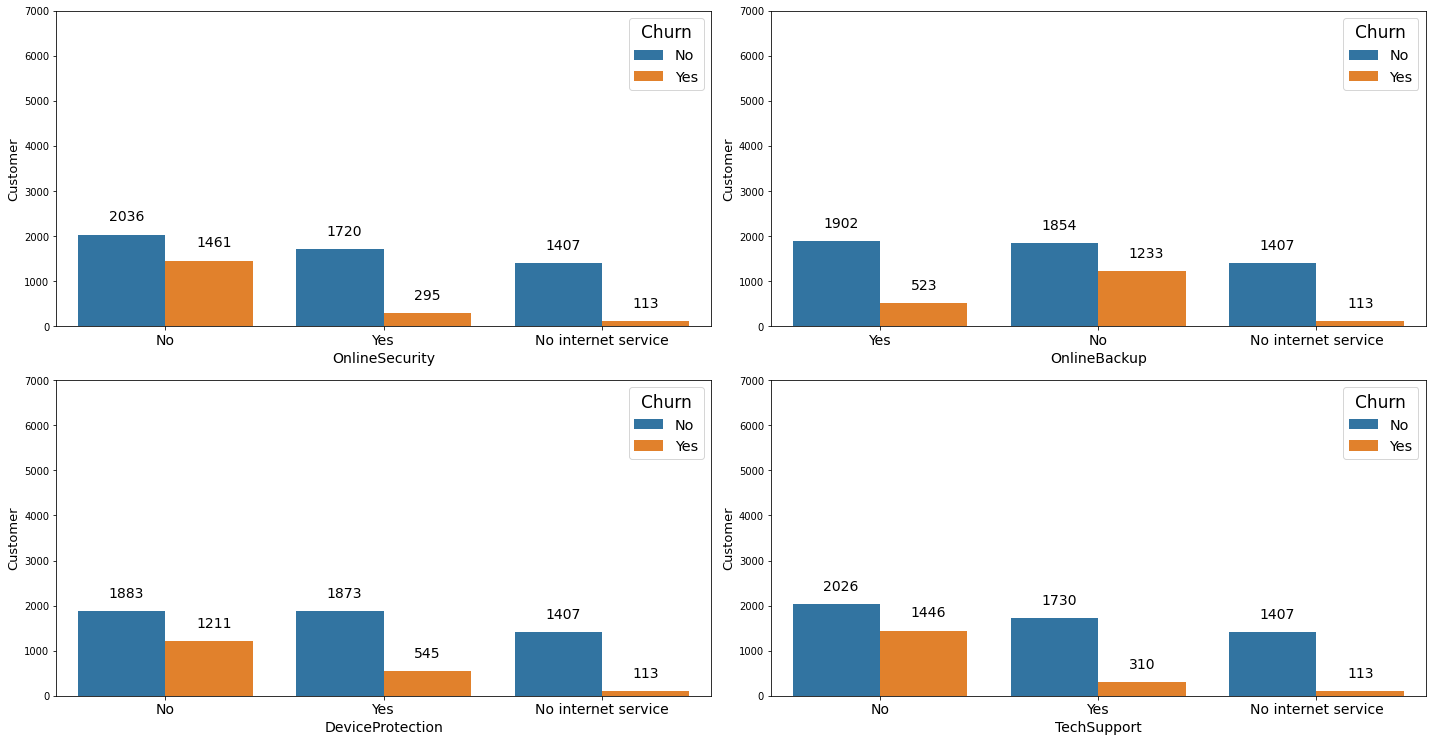

In [ ]:
# categorical - categorical bivariate analysis for support category
plt.figure(figsize=(20,15))
for i, col in enumerate(support_ctg):
  plt.subplot(3,2,i+1)
  ax = sns.countplot(data=telco_churn, x=col, hue='Churn')

  plt.xlabel(col, fontsize=14)
  plt.ylabel('Customer',fontsize=13)
  plt.ylim(0,7000)
  plt.xticks(fontsize=14)
  plt.legend(title='Churn',fontsize='x-large',title_fontsize='17')
  for p in ax.patches:
      ax.annotate((p.get_height()),(p.get_x()+0.14, p.get_height()+300), fontsize=14)
plt.tight_layout()
plt.show()

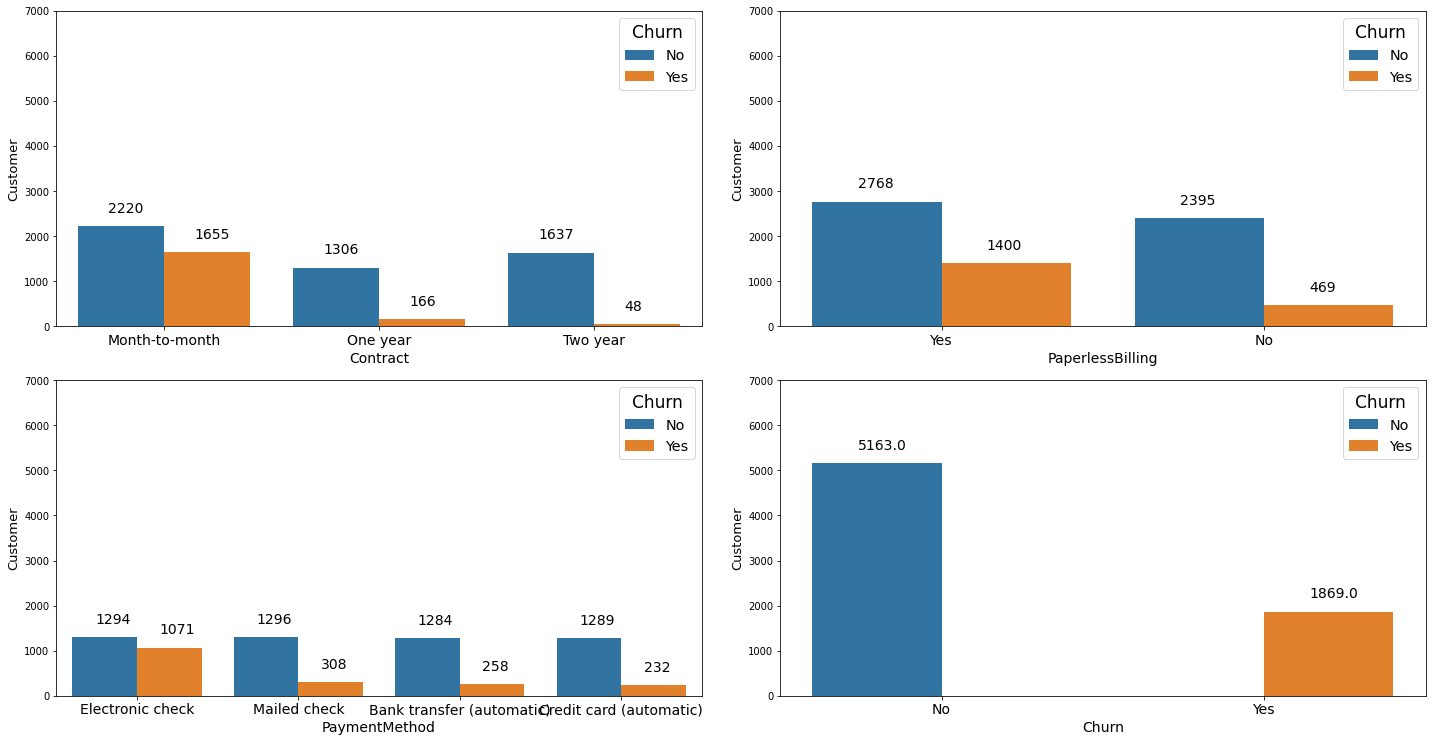

In [ ]:
# categorical - categorical bivariate analysis for user info
plt.figure(figsize=(20,15))
for i, col in enumerate(user_info):
  plt.subplot(3,2,i+1)
  ax = sns.countplot(data=telco_churn, x=col, hue='Churn')

  plt.xlabel(col, fontsize=14)
  plt.ylabel('Customer',fontsize=13)
  plt.ylim(0,7000)
  plt.xticks(fontsize=14)
  plt.legend(title='Churn',fontsize='x-large',title_fontsize='17')
  for p in ax.patches:
      ax.annotate((p.get_height()),(p.get_x()+0.14, p.get_height()+300), fontsize=14)
plt.tight_layout()
plt.show()

observation
1. **demograph_ctg**: seeing from `gender` there is no significant difference for `Churn`, in other side, who did `Churn` is coming from who doesn't has `Partner` , or `Dependents`, and who have `Senior Citizen` in their home
2. **service_ctg**: in this category, `Churn` is coming from who have `Phone Service`, `Multiple Lines`, `Fiber Optic` and in other side who don't have `Streaming TV` nor `Streaming Movies`
3. **support_ctg** : majority of `Churn` is coming from people who don't use this support category `OnlineSecurity`,`OnlineBackup`,`DeviceProtection`,`TechSupport`
4. **user_info** : `Churn` is coming from people who use `Paperless Billing`, and `Electronic check` with payment duartion `Month-to-month`

### Bivariate analysis using numerical features with Churn as predictor

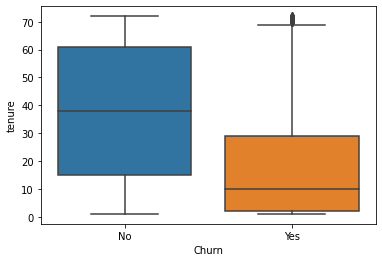

In [ ]:
# bivariate analysis between numerical churn by tenure
sns.boxplot(x = telco_churn.Churn, y = telco_churn.tenure)

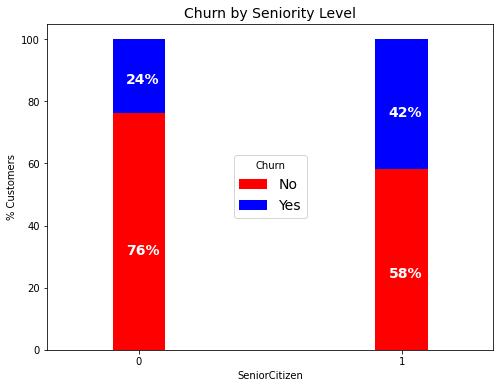

In [ ]:
# bivariate analysis between numerical churn by seniority
colors = ['red','blue']
seniority_churn = telco_churn.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

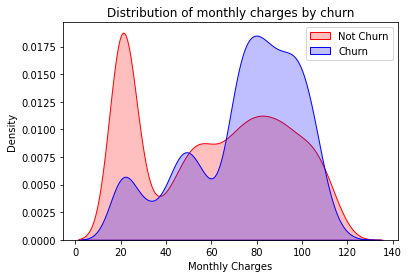

In [ ]:
# bivariate analysis between numerical churn by Monthly Charge
ax = sns.kdeplot(telco_churn.MonthlyCharges[(telco_churn["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telco_churn.MonthlyCharges[(telco_churn["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Text(0.5, 1.0, 'Distribution of total charges by churn')

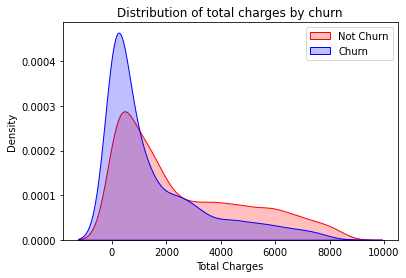

In [ ]:
# bivariate analysis between numerical churn by Total Charge
ax = sns.kdeplot(telco_churn.TotalCharges[(telco_churn["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telco_churn.TotalCharges[(telco_churn["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

observation: 
1. Churn by tenure : Customers/User/People that do not churn tend to stay for a longer period of time
2. Churn by seniority: senior citizens is nearly double for churn rather than younger group
3. Churn by monthly charge: churn user is higher in `Monthly Charges`
4. Churn by Total Charge: churn is gigher when `Total Charges` is lower 

# Multivariate Analysis

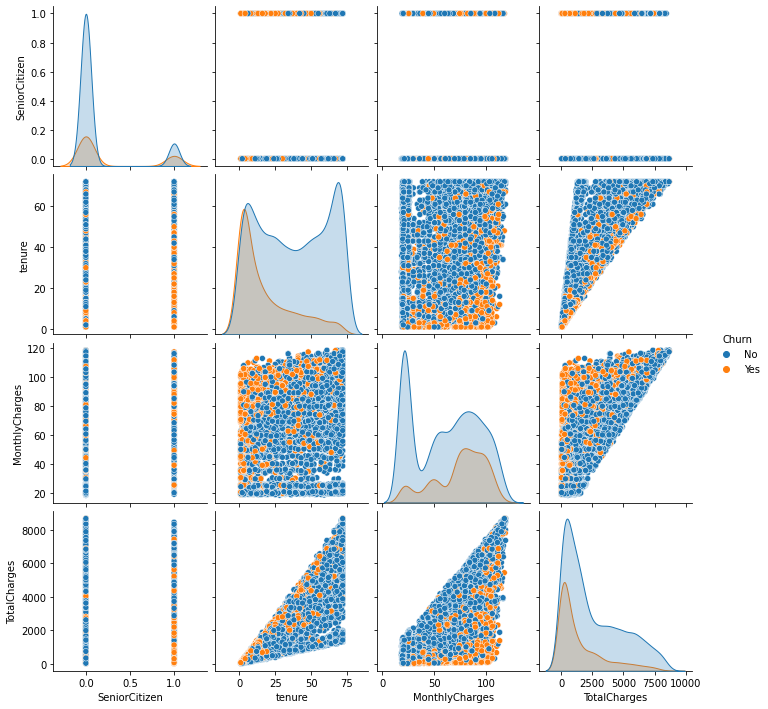

In [ ]:
# Numerical-numerical variables
sns.pairplot(data = telco_churn, hue='Churn')
plt.show()

observation:
it showing there is correlation from `MonthlyCharges` and `tenure` with `Churn`

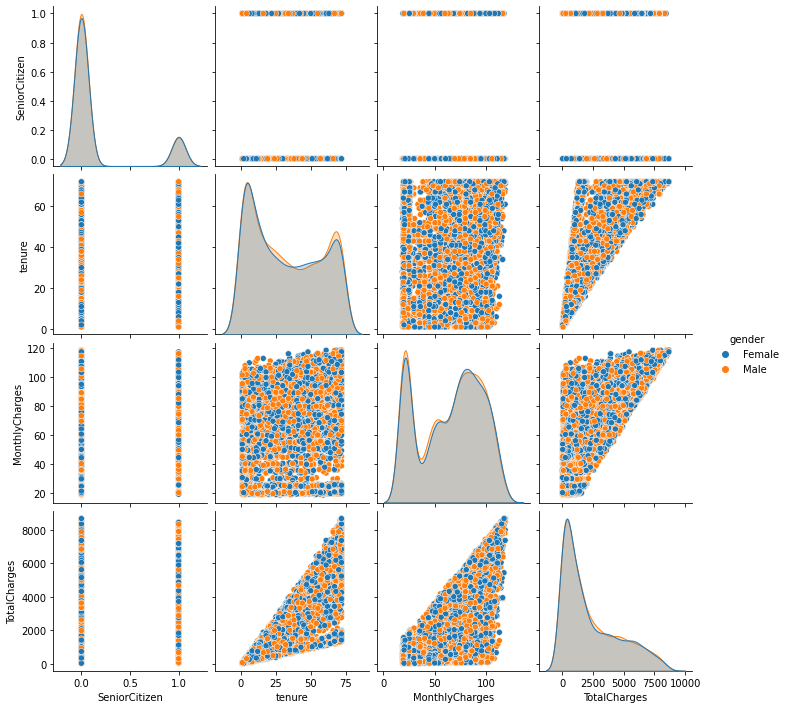

In [ ]:
# Numerical-numerical variables
sns.pairplot(data = telco_churn, hue='gender')
plt.show()

observation:
it showing there is fair distribution in numerical values between `gender`

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text major ticklabel objects>)

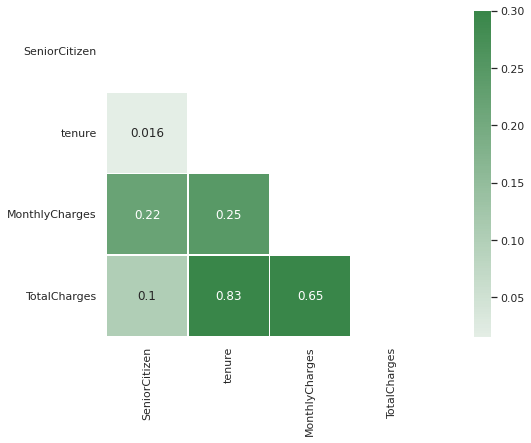

In [ ]:
# correlation heatmap
telco_churn_corr = telco_churn.corr()

sns.set(style='white')
mask = np.zeros_like(telco_churn_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 6))

cmap = sns.diverging_palette(255, 133, as_cmap=True)

sns.heatmap(telco_churn_corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=0.5, annot=True)

plt.yticks(rotation=0, ha="right")
plt.xticks(rotation=90, ha="center")

observation: `TotalCharges` has high positive correlation with `tenure` and `MonthlyCharges`

# Conclusion Finding EDA: 

1. Each categorical shows churn rate is always there with high user churn rate 
2. Most users with Month-to-month contract and Fiber optic Internet Service are churned
3. Correlation netween numerical features and churn is quite strong

## Deep dive Questions
1. How is monthly count user per gender according to churn?
2. How is user counted with Internet service and how big the ration between `Churn` YES or NO?
3. How does does PaymentMethod and InternetService type affect churn?


In [ ]:
# grouping churn by gender and counting the monthly user
telco_churn.groupby(['Churn','gender',]).agg(
    avg_month = ('MonthlyCharges','mean'),
    avg_tenure = ('tenure','mean'),
    total_user = ('customerID','count')
)

avg_month  avg_tenure  total_user
Churn gender                                   
No    Female  61.674941   37.933176        2544
      Male    60.950401   37.374952        2619
Yes   Female  74.812087   17.004260         939
      Male    74.066989   18.963441         930

Output: Monthly distribution by gender between tenure and churn YES and NO is similiar and no significant difference 

In [ ]:
telco_churn.groupby(['Churn','InternetService','Partner']).agg(
    avg_month = ('MonthlyCharges','mean'),
    avg_tenure = ('tenure','mean'),
    total_user = ('customerID','count')
)

avg_month  avg_tenure  total_user
Churn InternetService Partner                                   
No    DSL             No       56.041353   28.020408         931
                      Yes      63.973635   45.708577        1026
      Fiber optic     No       90.601925   32.493168         805
                      Yes      96.629577   49.861167         994
      No              No       20.781508   24.167852         703
                      Yes      21.484304   40.758523         704
Yes   DSL             No       47.987539    9.984424         321
                      Yes      51.631884   23.710145         138
      Fiber optic     No       86.332516   15.179874         795
                      Yes      90.967530   28.141434         502
      No              No       20.271429    6.416667          84
                      Yes      20.648276   13.517241          29

Output: We see Churn YES or NO, user are coming from people with partner either with or without fiber optic the difference/ratio is not high

In [ ]:
# How does PaymentMethod and Contract type affect churn?
# convert churn onto boolean
telco_churn['Churn'] = telco_churn['Churn'].map( {'No': 0, 'Yes': 1} ).astype(int)

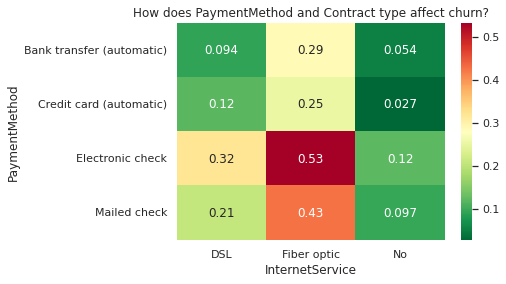

In [ ]:
## Create pivot table
result = pd.pivot_table(data=telco_churn, index='PaymentMethod', columns='InternetService',values='Churn')
## create heat map of education vs marital vs response_rate
sns.heatmap(result, annot=True, cmap = 'RdYlGn_r').set_title('How does PaymentMethod and Contract type affect churn?')
plt.show()

Output: shows electronical check with Fiber optic is likely to Churn 